<a href="https://colab.research.google.com/github/danielruizuleta/Proyecto-Grupo-Argos/blob/main/TP/6%20Modelo_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Clasificación

Queremos definir si el usuario es Alpha o Betha

In [ ]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv('dataset_alpha_betha.csv')

# Inspeccionar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Información general sobre el dataset
print("\nInformación sobre el dataset:")
print(data.info())

# Descripción estadística para variables numéricas
print("\nDescripción estadística:")
print(data.describe())


Primeras filas del dataset:
       autoID  SeniorCity Partner Dependents Service1          Service2  \
0  7590-VHVEG           0     Yes         No       No  No phone service   
1  5575-GNVDE           0      No         No      Yes                No   
2  3668-QPYBK           0      No         No      Yes                No   
3  7795-CFOCW           0      No         No       No  No phone service   
4  9237-HQITU           0      No         No      Yes                No   

  Security OnlineBackup DeviceProtection TechSupport        Contract  \
0       No          Yes               No          No  Month-to-month   
1      Yes           No              Yes          No        One year   
2      Yes          Yes               No          No  Month-to-month   
3      Yes           No              Yes         Yes        One year   
4       No           No               No          No  Month-to-month   

  PaperlessBilling              PaymentMethod  Charges   Demand  Class  
0              

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Identificar columnas categóricas (si las hay)
categorical_columns = data.select_dtypes(include=['object']).columns

# Convertir variables categóricas en variables numéricas
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Comprobar si hay valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Dividir el dataset en variables independientes (X) y la variable objetivo (y)
X = data.drop(columns=['Class'])  # 'Class' es la columna objetivo
y = data['Class']

# Dividir el dataset en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDatos de entrenamiento y prueba preparados.")



Valores faltantes por columna:
autoID              0
SeniorCity          0
Partner             0
Dependents          0
Service1            0
Service2            0
Security            0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges             0
Demand              0
Class               0
dtype: int64

Datos de entrenamiento y prueba preparados.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inicializar el clasificador Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nPrecisión del modelo:", accuracy)
print("\nReporte de clasificación:")
print(report)

# Guardar el modelo entrenado
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

# Guardar las métricas en un archivo de texto
with open('model_metrics.txt', 'w') as f:
    f.write(f"Precisión del modelo: {accuracy}\n")
    f.write("\nReporte de clasificación:\n")
    f.write(report)

print("\nModelo y métricas guardados.")



Precisión del modelo: 0.7863733144073811

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1036
           1       0.63      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409


Modelo y métricas guardados.


Puntos Claves:
* La presición del del modelo general 78.6% es relativamente buena, hay rango de manero dependiendo de las clasificaciones de la clase.
* Para la Clase Alpha las predicciones son destacables, generan confianza.
* Para Betha existe mayores dificultades al momento de hacer la predicción, el modelo no tiene una confiabilidad suficiente, posiblemente hay una afectación por el desbalanceo de los datos.
*El redendimiento del modelo es bueno, el analista puede tomar decisiones en base a estos resultados principalmente para la clase Alpha. Claramente se puede mejorar la confiabilidad con algunos ajustes.

# Cargar y analizar datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   autoID            7043 non-null   object 
 1   SeniorCity        7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Service1          7043 non-null   object 
 5   Service2          7043 non-null   object 
 6   Security          7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  Charges           7043 non-null   float64
 14  Demand            7043 non-null   object 
 15  Class             7043 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory

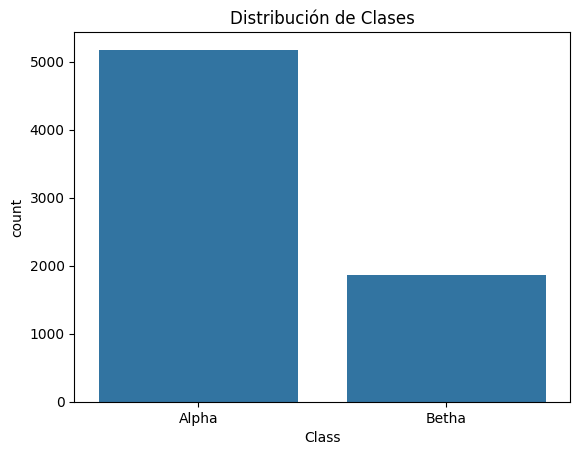

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
data = pd.read_csv('dataset_alpha_betha.csv')

# Ver las primeras filas del dataset
data.head()

# Descripción estadística de los datos
data.describe()

# Revisar los tipos de datos y la presencia de valores nulos
data.info()

# Revisar la distribución de clases
sns.countplot(x='Class', data=data)
plt.title('Distribución de Clases')
plt.show()


Validación de datos nulos

In [ ]:
# Verificar si hay valores nulos
data.isnull().sum()



,0
autoID,0
SeniorCity,0
Partner,0
Dependents,0
Service1,0
Service2,0
Security,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0


Escalado de caracteristicas

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = data.copy()

# Normalizar las características numéricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_scaled[numerical_cols] = scaler.fit_transform(data_scaled[numerical_cols])

# Verificar los datos escalados
data_scaled.head()


,autoID,SeniorCity,Partner,Dependents,Service1,Service2,Security,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges,Demand,Class
0,7590-VHVEG,-0.439916,Yes,No,No,No phone service,No,Yes,No,No,Month-to-month,Yes,Electronic check,-1.160323,29.85,Alpha
1,5575-GNVDE,-0.439916,No,No,Yes,No,Yes,No,Yes,No,One year,No,Mailed check,-0.259629,1889.5,Alpha
2,3668-QPYBK,-0.439916,No,No,Yes,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,-0.362660,108.15,Betha
3,7795-CFOCW,-0.439916,No,No,No,No phone service,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),-0.746535,1840.75,Alpha
4,9237-HQITU,-0.439916,No,No,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,151.65,Betha


In [ ]:
X = data_scaled.drop('Class', axis=1)  # Características
y = data_scaled['Class']  # Etiquetas


In [ ]:
# Verifica los tipos de datos de las columnas
print(data.dtypes)



autoID               object
SeniorCity            int64
Partner              object
Dependents           object
Service1             object
Service2             object
Security             object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges             float64
Demand               object
Class                object
dtype: object


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

data = pd.read_csv('dataset_alpha_betha.csv')

# Eliminar la columna autoID que no es relevante
data.drop(columns=['autoID'], inplace=True, errors='ignore')

data['Class'] = data['Class'].astype('category')

X = data.drop(columns=['Class'])
y = data['Class']

categorical_columns = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  #
)

# Preprocesar las variables predictoras
X_processed = preprocessor.fit_transform(X)

# Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Balancear las clases utilizando SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' balanceará las clases a la misma cantidad
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Entrenar un modelo (usamos Random Forest como ejemplo)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

y_pred = model.predict(X_test)


print("Reporte de clasificación para el modelo entrenado:")
print(classification_report(y_test, y_pred))


joblib.dump(model, 'random_forest_model_balanced.pkl')

with open('classification_report_balanced.txt', 'w') as f:
    f.write("Reporte de clasificación para el modelo entrenado (con balanceo de clases):\n")
    f.write(classification_report(y_test, y_pred))


Reporte de clasificación para el modelo entrenado:
              precision    recall  f1-score   support

       Alpha       0.82      0.87      0.85      1539
       Betha       0.59      0.50      0.54       574

    accuracy                           0.77      2113
   macro avg       0.71      0.69      0.69      2113
weighted avg       0.76      0.77      0.76      2113



El balance al parecer no mejoró el resultado del modelo, entrenamos el modelo con Random Forest. El balanceo acordé a experiencias y papers leidos de mi parte no es que mejoren mucho el modelo.

In [ ]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Cargar los datos
data = pd.read_csv('dataset_alpha_betha.csv')

# Dividir en X (características) e y (variable objetivo 'Class')
X = data.drop(columns=['autoID', 'Class'])  # Eliminamos 'autoID' que no es relevante para el modelo
y = data['Class']

# Paso 1: Preprocesamiento - Codificación de variables categóricas

# Usaremos LabelEncoder para las variables categóricas binarias (por ejemplo, 'Yes', 'No')
label_cols = ['Partner', 'Dependents', 'Service1', 'Service2', 'Security', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Demand']

# Aplicar LabelEncoder a las columnas categóricas
encoder = LabelEncoder()
for col in label_cols:
    X[col] = encoder.fit_transform(X[col])

# Verificación
print(X.head())

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lista de modelos a probar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": SVC(kernel='linear'),
    "Kernel SVC": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-NN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian Naive Bayes": GaussianNB()
}

# Entrenamos y evaluamos cada modelo
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Evaluación
    print(f"Accuracy: {model.score(X_test, y_test)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


   SeniorCity  Partner  Dependents  Service1  Service2  Security  \
0           0        1           0         0         1         0   
1           0        0           0         1         0         2   
2           0        0           0         1         0         2   
3           0        0           0         0         1         2   
4           0        0           0         1         0         0   

   OnlineBackup  DeviceProtection  TechSupport  Contract  PaperlessBilling  \
0             2                 0            0         0                 1   
1             0                 2            0         1                 0   
2             2                 0            0         0                 1   
3             0                 2            2         1                 0   
4             0                 0            0         0                 1   

   PaymentMethod  Charges  Demand  
0              2    29.85    2505  
1              3    56.95    1466  
2             

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7903454803596782
Classification Report:
              precision    recall  f1-score   support

       Alpha       0.84      0.89      0.86      1539
       Betha       0.64      0.53      0.58       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix:
[[1364  175]
 [ 268  306]]

Evaluating Linear SVC:
Accuracy: 0.7846663511594889
Classification Report:
              precision    recall  f1-score   support

       Alpha       0.82      0.89      0.86      1539
       Betha       0.63      0.49      0.55       574

    accuracy                           0.78      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.77      0.78      0.78      2113

Confusion Matrix:
[[1377  162]
 [ 293  281]]

Evaluating Kernel SVC:
Accuracy: 0.7283483199242783
Classification Report:
              precision    recall  f1-score   suppor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[1266  273]
 [ 283  291]]

Evaluating K-NN:
Accuracy: 0.7453857075248462
Classification Report:
              precision    recall  f1-score   support

       Alpha       0.79      0.89      0.84      1539
       Betha       0.55      0.36      0.43       574

    accuracy                           0.75      2113
   macro avg       0.67      0.62      0.63      2113
weighted avg       0.72      0.75      0.73      2113

Confusion Matrix:
[[1370  169]
 [ 369  205]]

Evaluating Gaussian Naive Bayes:
Accuracy: 0.7600567912920019
Classification Report:
              precision    recall  f1-score   support

       Alpha       0.88      0.77      0.82      1539
       Betha       0.54      0.73      0.62       574

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113

Confusion Matrix:
[[1187  352]
 [ 155  419]]


El modelo que tiene un mejor rendiemiento de los evaluados es logistic regression, tiene una notable certeza en la clase Alpha y es aceptable la confianza en Betha. La mayoria de modelos estuvieron por encima del 70% en promedio, y en todos los casos la mayor confiabilidad esta en el perfil Alpha.